# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

# Семинар 13. Математический анализ


На этом семинаре мы попрактикуемся с вами в написании градиентных спусков и нахождении минимумов функций, что будет крайне важно для нас при обсуждении вопросов машинного обучения в дальнейшем!

In [ ]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

## Градиентный спуск

Для начала давайте рассмотрим следующую функцию от двух переменных:

$$f(x,y) = 5x^2 + y^2 + 1$$

### Задание для самостоятельного решения (написание функции двух переменных)

Реализуйте в коде данную функцию от двух переменных!

In [ ]:
def f(xy):

    # your code here

    pass

Для того чтобы проверить, правильно ли мы её реализовали, посчитаем значение в какой-нибудь точке. Например, в точке `(0, 0)`

In [ ]:
print(f"В точке x = {0}, y = {0}, функция принимает значение {f([0,0])}")

В точке x = 0, y = 0, функция принимает значение 1


Всё отлично!

Давайте теперь визуализируем полученный результат и построим трёхмерный график нашей функции.

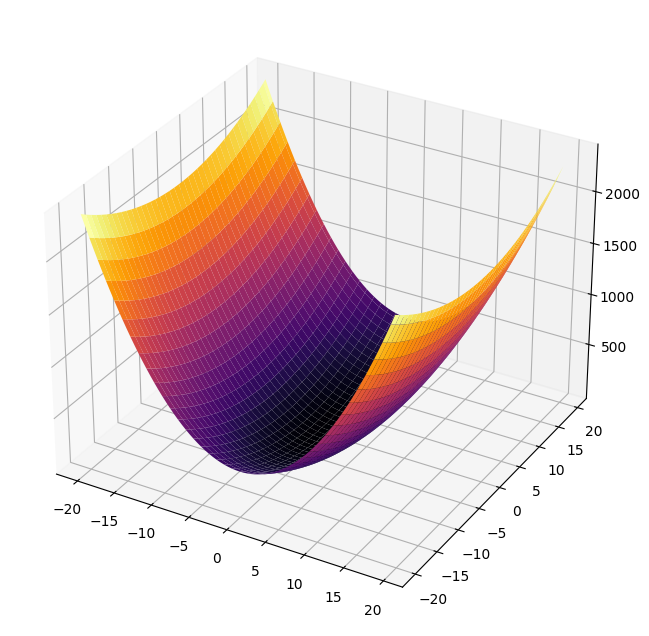

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

При необходимости, можно как всегда поменять цветовую палитру в соответствии с вашими предпочтениями! :)

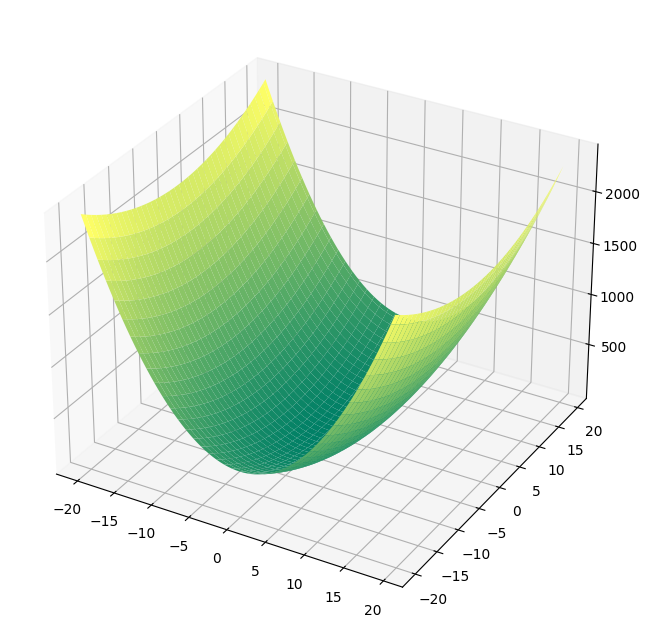

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='summer')

fig.show()

По-моему, совсем неплохо!

Даже если мы с вами так и не справимся освоить градиентный спуск — смотрите, мы как минимум научились рисовать трехмерные графики функций от двух переменных!

Это ли не прекрасно? Идем устраиваться в Яндекс! :)

### Вопрос

Теперь давайте вернемся к нашей функции. Чему будет равен её градиент?

Градиент функции — это вектор из её частных производных. Посчитаем частные производные и получим, что градиент равен:

$$\overline g(x,y) = (10x, 2y)$$

### Задание для самостоятельного решения (написание градиента функции)

Реализуйте подсчёт градиента нашей функции!

In [ ]:
def g(xy):

    # your code here

    pass

Опять же, проверим правильность, подсчитав значение градиента в какой-нибудь точке

In [ ]:
print(f"В точке x = {1}, y = {2}, градиент функции принимает значение {g([1, 2])}")

В точке x = 1, y = 2, градиент функции принимает значение [10  4]


Всё правильно! Отлично!

### Вопрос

В какой точке эта функция имеет минимум?

Давайте перейдем к нахождению минимума функции. Для осуществления этого этапа воспользуемся алгоритмом градиентного спуска, подробно рассматривавшемся на лекции.

Вспомним только перед этим, как он выглядит формульно:

$$w^{n+1} = w^{n} - \alpha \frac{∇f(w^n)}{\|∇f(w^n)\|}$$

### Задание для самостоятельного решения (написание градиентного спуска)

Реализуйте функцию, которая принимает на вход начальное положение (начальную точку) и функцию вычисления градиента и которая осуществляет поиск минимума при помощи градиентного спуска.


In [ ]:
def grad_descent(w0, func_grad, alpha=0.01, tolerance=0.0001, n_iter=150):
    """
    args:
        - w0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - func_grad - градиент функции (питоновская функция, которая принимает на вход координаты и по ним считает градиент)
        - alpha     - leraning rate (шаг обучения)
        - tolerance - критерий остановки (если изменение весов меньше чем это значение)
        - n_iter    - количество итераций в градиентном спуске
    """

    w = np.array(w0)
    history = [w]

    # your code here

    # В качестве критерия остановки используйте следующее условие
    # if np.mean(abs(w - history[-2])) < tolerance:

    return np.array(history)

Теперь запустим реализованную нами функцию с разными начальными точками — например, давайте возьмем `(18, 7)`


In [ ]:
history = grad_descent(np.array([18, 7]), g, alpha=0.01, n_iter=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

Всё выполнилось!

Кстати, как вы думаете, как обычно выбирается вот это начальное приближение, которое мы с вами сейчас приняли за `(18, 7)`?

Посмотрим, чему равен полученный нами массив `history`.

In [ ]:
history

array([[ 1.80000000e+001,  7.00000000e+000],
       [ 1.79900301e+001,  6.99922456e+000],
       [ 1.79800602e+001,  6.99844879e+000],
       ...,
       [-6.05382350e-003, -9.38724727e-323],
       [ 3.94617650e-003, -9.38724727e-323],
       [-6.05382350e-003, -9.38724727e-323]])

Отрисуем то, как менялись координаты в процессе поиска минимума


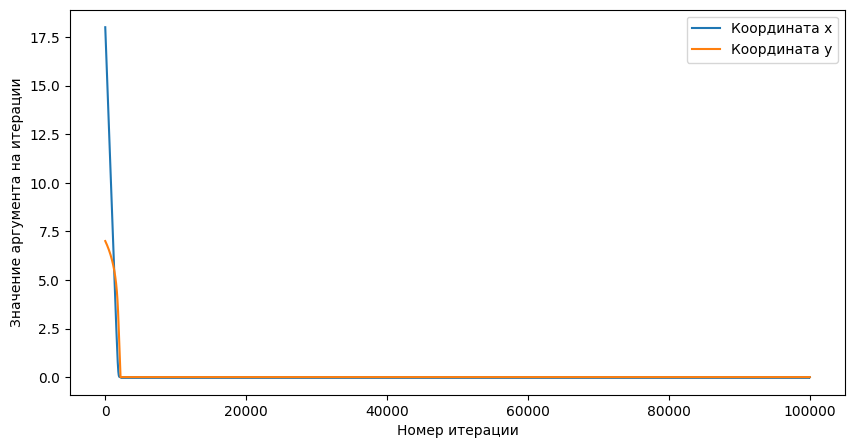

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')

plt.legend(['Координата x', 'Координата y'])

plt.show()

Ещё интереснее будет отрисовать путь, который прошел наш алгоритм, прежде чем сойтись в минимум


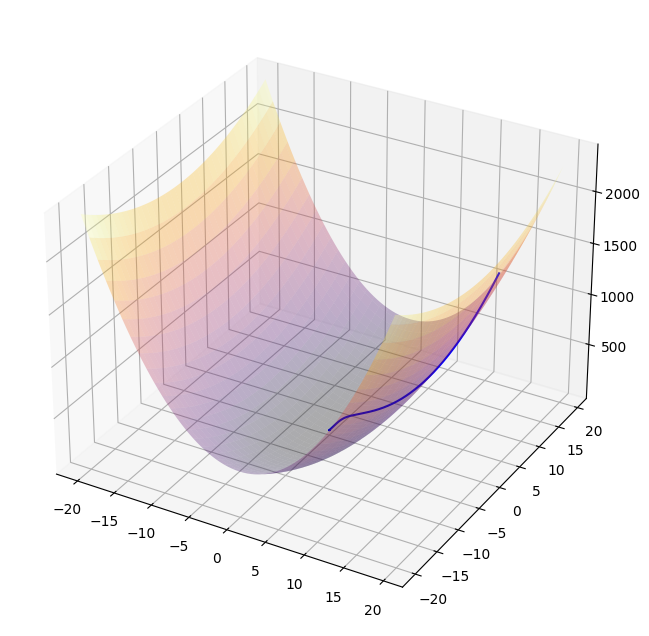

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

# Отрисовываем функцию с прозрачностью 0.3
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

# Точно так же отрисовываем путь, передав значения в нулевой, первой
# колонках history, а также значения функции f в этих точках
ax.plot(history[:, 0], history[:, 1], f([history[:, 0], history[:, 1]]), color='blue')

fig.show()

### Эксперименты с функциями

Если вам любопытно и вы хотите поэксперементировать со своими функциями, вы можете сделать это в рамках данной секции.

Например, определите ниже какую-нибудь свою функцию от 2 переменных и посмотрите, что получится в итоге!

In [ ]:
def f(xy):
    x, y = xy

    return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)

<ipython-input-22-796369ae90bf>:4: RuntimeWarning: divide by zero encountered in log
  return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)


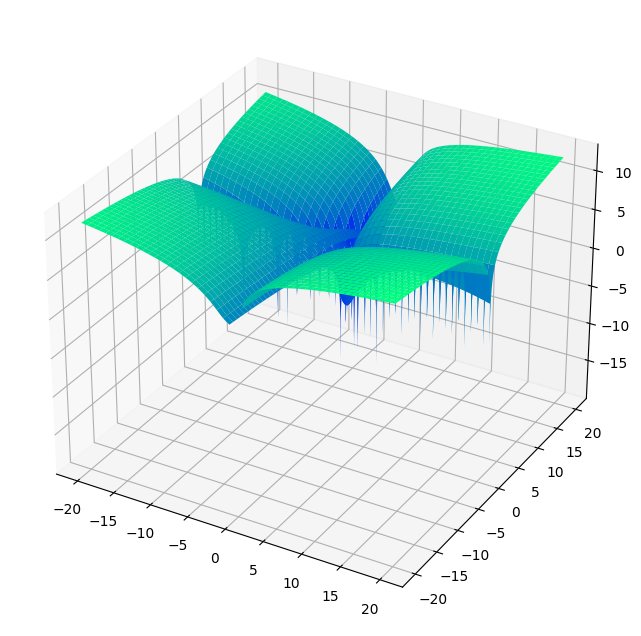

In [ ]:
u, v = np.mgrid[-20:20:0.05, -20:20:0.05]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='winter')

fig.show()

## Модификации градиентного спуска

Теперь давайте рассмотрим следующую функцию:

$$f(x, y) = (x - y)^2$$

Реализуем ее в коде в соответствии с тем, как делали это раннее:


In [ ]:
def f(xy):
    x, y = xy

    return (x - y)**2

Проверим, что всё правильно

In [ ]:
print(f"В точке x = {0}, y = {0}, функция принимает значение {f([0,0])}")

В точке x = 0, y = 0, функция принимает значение 0


Построим трехмерный график


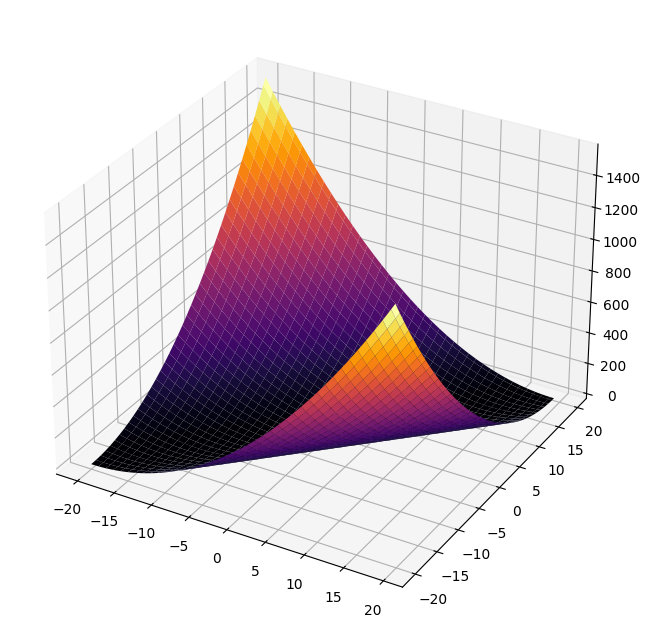

In [ ]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

### Вопрос

В чём заключается принципиальное отличие данной функции от предыдущей?

Теперь перейдем к подсчету градиента.

### Вопрос

Чему равняется градиент данной функции?

Градиент для неё будет следующим:

$$\overline g(x,y) = (2(x-y), 2(y-x))$$

Реализуем подсчет градиента:

In [ ]:
def g(xy):
  x, y = xy

  return np.array([2 * (x - y), 2 * (y - x)])

Проверим корректность

In [ ]:
print(f"В точке x = {1}, y = {2}, градиент функции принимает значение {g([1, 2])}")

В точке x = 1, y = 2, градиент функции принимает значение [-2  2]


Для нахождения минимума функции не всегда используют стандартный градиентный спуск. Хорошей модификацией градиентного спуска является алгоритм `momentum`.

Главным преимуществом алгоритма `momentum` является то, что он учитывает предыдущие шаги для ускорения сходимости алгоритма. Это делается путем добавления доли предыдущего обновления параметров к текущему обновлению, что помогает преодолевать локальные минимумы и сглаживать колебания в процессе оптимизации. Всё вместе это приводит `momentum` к более быстрой и стабильной сходимости к оптимальным значениям параметров модели по сравнению со стандартным градиентным спуском.

Вот как `momentum` выглядит формульно:

$$g^{n} = \beta g^{n - 1} + (1 - \beta) \frac{∇f(w^{n-1})}{\|∇f(w^{n-1})\|}$$  

$$w^{n+1} = w^{n} - \alpha \frac{g^n}{\|g^n\|}$$

**NOTE:** $g^0$ принимают равным 0, потому что до начала движения у нас еще нет инерции.

### Задание для самостоятельного решения (написание momentum)

Реализуйте функцию, которая принимает на вход начальное положение (начальную точку) и функцию вычисления градиента и которая осуществляет поиск минимума при помощи алгоритма `momentum`.


In [ ]:
# Реализуем функцию, которая принимат начальное положение и функцию вычисления градиента и находит минимум при помощи метода momentum

def momentum(w0, func_grad, beta=0.01, alpha=0.01, tolerance=0.0001, n_iter=150):
    """
    args:
        - w0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - func_grad - градиент функции (питоновская функция, которая принимает на вход координаты и по ним считает градиент)
        - beta      - какое влияние будет оказывать момент (чем выше значение, тем меньше влияние)
        - alpha     - leraning rate (шаг обучения)
        - tolerance - критерий остановки (если изменение весов меньше чем это значение)
        - n_iter    - количество итераций в градиентном спуске
    """

    w = np.array(w0)
    history = [w]

    g = 0

    # your code here

    # В качестве критерия остановки используйте следующее условие
    # if np.mean(abs(w - history[-2])) < tolerance:

    return np.array(history)

Запустим реализованную нами функцию с разными начальными точками — например `(18, 7)`, `(10, 20)`, `(-15, 15)`


In [ ]:
history_1 = momentum(np.array([18, 7]),   g, alpha=0.01, n_iter=10000)
history_2 = momentum(np.array([10, 20]),  g, alpha=0.01, n_iter=10000)
history_3 = momentum(np.array([-15, 15]), g, alpha=0.01, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Отрисуем то, как менялись координаты в процессе поиска минимума


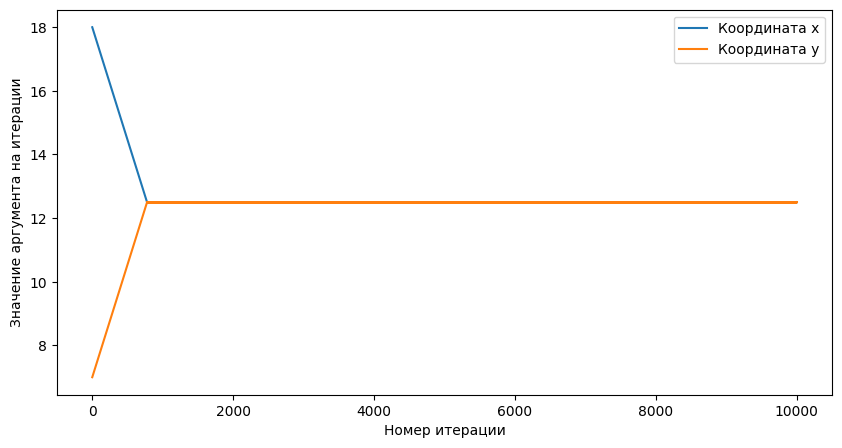

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history_1)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')

plt.legend(['Координата x', 'Координата y'])

plt.show()

Отрисуем путь, который прошел наш алгоритм, прежде чем сойтись в минимум. Сделаем это для всех запусков


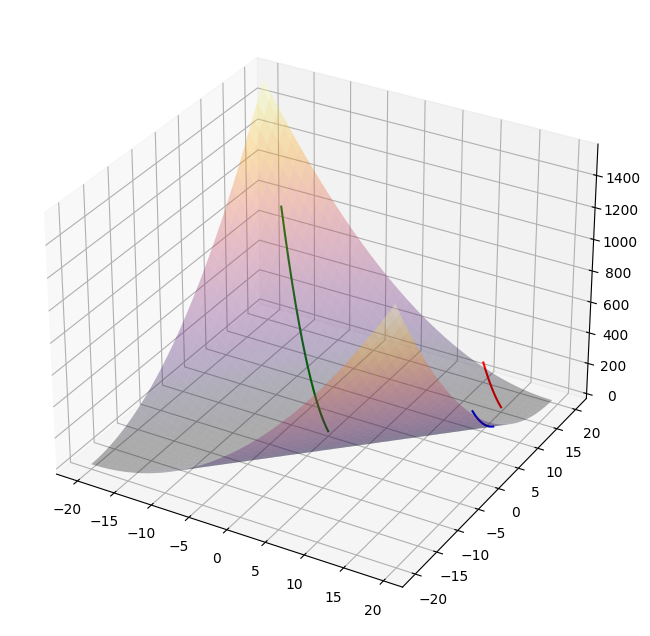

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

ax.plot(history_1[:, 0], history_1[:, 1], f([history_1[:, 0], history_1[:, 1]]), color='blue')
ax.plot(history_2[:, 0], history_2[:, 1], f([history_2[:, 0], history_2[:, 1]]), color='red')
ax.plot(history_3[:, 0], history_3[:, 1], f([history_3[:, 0], history_3[:, 1]]), color='green')

fig.show()

### Вопрос

Почему у нас ни разу не выполнилось условие остановки? Как бы мы могли модифицировать алгоритмы, чтобы они сходились быстрее?

**Подсказка:** Подумайте, обязательно ли learning rate должен быть постоянным?

Можем внести определенные корректировки в этом направлении и посмотреть на то, сколько итераций потребуется алгоритму с учетом этих корректировок!